# Resumo sobre filtros

## Filtros

O filtro na verdade √© uma pequena matriz que usamos para deixar a imagem mais n√≠tida ou borrada, por exemplo. Para fazer isso, precisamos fazer uma opera√ß√£o de convolu√ß√£o.

Vamos ver, na pr√°tica o que seria uma convolu√ß√£o, em termos simples. 

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O pr√≥ximo passo √© fazer uma opera√ß√£o de convolu√ß√£o com filtro 3x3. O produto final desse processo de convolu√ß√£o ser√° uma matriz 4x4. N√≥s calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como voc√™ pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Ap√≥s avaliar a e excpress√£o acima n√≥s obtemos o resulto de -5. Esse ser√° o valor do pixel naquela posi√ß√£o na nossa imagem com o filtro aplicado. Ent√£o, n√≥s vamos movendo o filtro ao longo da imagem e vamos criando a imagem pronta.

Note que o nosso filtro √© uma matriz com a mesma altura e largura (3√ó3, 5√ó5, 9√ó9). Sempre usamos n√∫meros √≠mparespois precisamos ter um pixel ao centro dessa matriz.

Agora que temos uma intui√ß√£o de como a matriz funciona, vamos ver ela em a√ß√£o na pr√°tica.


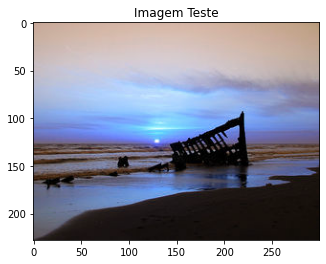

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

path = os.getcwd()

img = cv2.imread('sunset.png', 1)
plt.title("Imagem Teste")
plt.imshow(img)
plt.show()

### Criando filtros com Numpy

Pode-se criar filtros utilizando o numpy atrav√©s de matrizes 

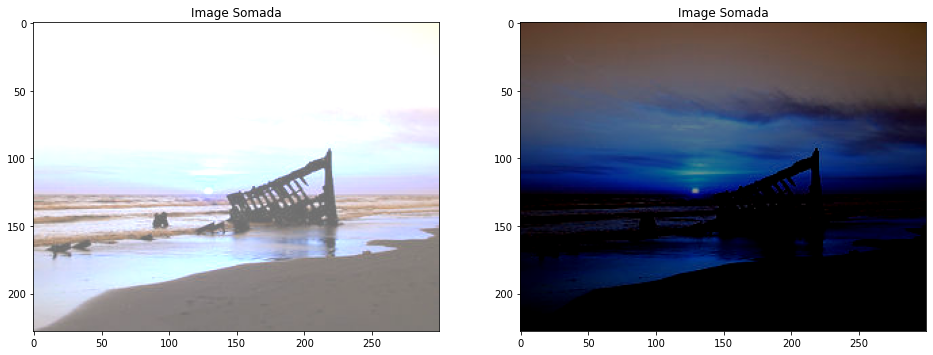

In [6]:
# utilizando o ones do numpy para criar o filtro
filtro_1 = np.ones(img.shape, dtype=np.uint8) * 110

# aplicando o filtro √† imagem
somada = cv2.add(img, filtro_1)
subtraida = cv2.subtract(img, filtro_1)

# mostrando a imagem com filtro
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Image Somada")
plt.imshow(somada)
plt.subplot(122)
plt.title("Image Subtraida")
plt.imshow(subtraida)
plt.show()

### Blurring
Nas opera√ß√µes acima, n√≥s est√°vamos tratando apenas de um canal, o que n√£o √© o mais comum quando lidamos com imagens, que normalmente est√£o no padr√£o **RGB** (Red, Blue, Green). Por isso, precisamos de outra forma de lidar com essas imagens.

Quando pensamos em canais como sendo uma "vis√£o" da imagem como um todo, dando √™nfase ou escondendo determinadas partes de acordo com as caracter√≠sticas de cada canal.


<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distin√ß√£o de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel s√£o praticamente intercambi√°veis, mas em geral, quando falamos de mais canais, eles s√£o bem diferentes. 

Cada filtro, na verdade, √© uma cole√ß√£o de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo √∫nico. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma vers√£o processada de cada um. √â importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em √™nfases em determinados canais, ou um canal ser mais sens√≠vel a mudan√ßas que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Ent√£o, cada uma das vers√µes processadas por cada canal s√£o somadas, formando um canal √∫nico. Os kernels de um filtro produzem uma vers√£o para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um vi√©s, peso. A forma que o *bias* funciona √© que cada output de filtro possui um vi√©s. Esse vi√©s √© adicionado ao canal obtido como output at√© agora e produz o output final do canal.

Portanto, quando falamos em qualquer n√∫mero de filtros, a forma de trabalho ser√° id√™ntica: Cada filtro processa o input por si s√≥, juntamos diferentes conjuntos de kernels com um vi√©s atrav√©s do processo descrito acima, produzindo um canal de output √∫nico. Ent√£o, eles s√£o concatenados para produzir um output geral final, com o n√∫mero de canais sendo o n√∫mero de filtros. Normalmente, tamb√©m √© aplicada uma n√£o-linearidade passando esse input por outra camada de convolu√ß√£o, o que repete o processo.

Vamos ver como isso funciona na pr√°tica.


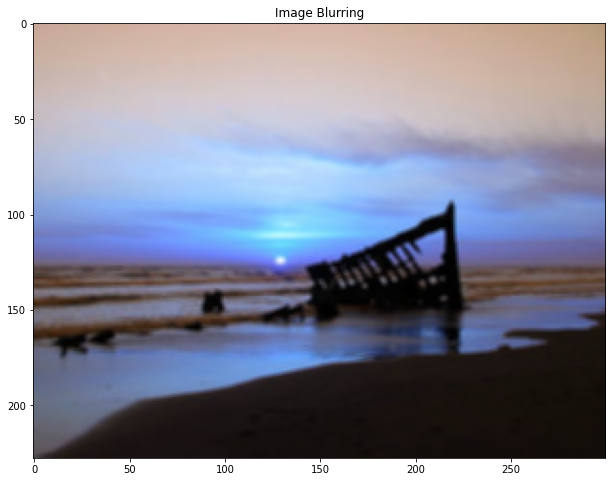

In [9]:
# criando o kernel
kernel_blur = np.ones((3,3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(img, -1, kernel_blur)

# mostrando a imagem com filtro
plt.figure(figsize=(16,8))
plt.title("Image Blurring")
plt.imshow(blurred)

### Gaussian Blur

Outra forma de aplicar um *blur*, um emba√ßado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro √© um pouco mais complexo, mas √© o tipo de kernel mais usado para processamento de imagens.

Para a cria√ß√£o desse filtro n√≥s usamos a **Fun√ß√£o Gaussiana**. Essa fun√ß√£o representa a probabilidade de eventos serem centrdos ao redor do valor da m√©dia. Al√©m disso, o desvio padr√£o (ùúé) dessa fun√ß√£o controla qu√£o ampla ser√° essa distribui√ß√£o. Ao tirar amostras de valores dessa fun√ß√£o, n√≥s consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padr√£o podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

Agora que temos uma intui√ß√£o no assunto, vamos ver como tudo isso fica na pr√°tica.



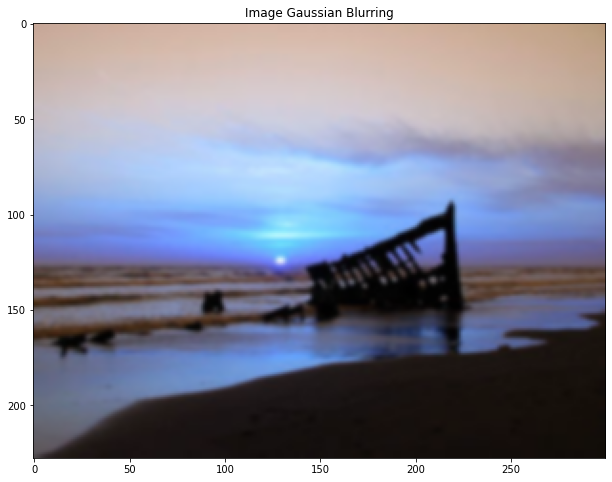

In [10]:
# utilizando o GaussianBlur, que j√° √© implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(img, (5,5), 0)

# visualizando a imagem
plt.figure(figsize=(16,8))
plt.title("Image Gaussian Blurring")
plt.imshow(gaussian_blurred)

# Efeito Motion:

Da mesma forma que implementamos o blur acima, tamb√©m podemos implementar um outro tipo de emba√ßado, o *Motion Blur*.

Motion significa movimento, ent√£o esse emba√ßado vai buscar agir de forma a acrescentar um emba√ßado que passe a impress√£o de movimento na imagem.

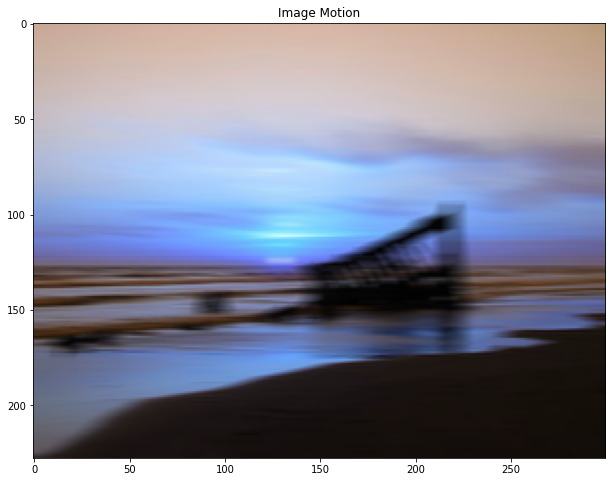

In [11]:
# implementando o filtro
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(img, -1, kernel_motion_blur)

# plotando a imagem
plt.figure(figsize=(16,8))
plt.title("Image Motion")
plt.imshow(motion_blurred)

### Sharpening

O contr√°rio de emba√ßar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse √© o conceito do *Sharpening*.

Nosso objetivo aqui √© exatamente esse, melhorar a nitidez, deixar a imagem menos emba√ßada. Para isso, tamb√©m podemos usar o OpenCV.

O processo de sharpening √© usado, normalmente, para melhorar os "limites" dentro da imagem, os *edges*. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, mas uma delas pode ser vista aqui embaixo:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

Abaixo, podemos ver essa implementa√ß√£o em forma de c√≥digo, onde criamos o array que representa esse filtro de sharpening. Esse filtro tem um centro positivo de 9 e todos os outros pontos possuem o valor -1. 

Para esse tipo de filtro, n√≥s n√£o temos uma implementa√ß√£o oficial do OpenCV. Por isso, vamos usar a fun√ß√£o `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por n√≥s, arbitrariamente. Esse filtro √© comumente usado para fazer sharpening em imagens coloridas.

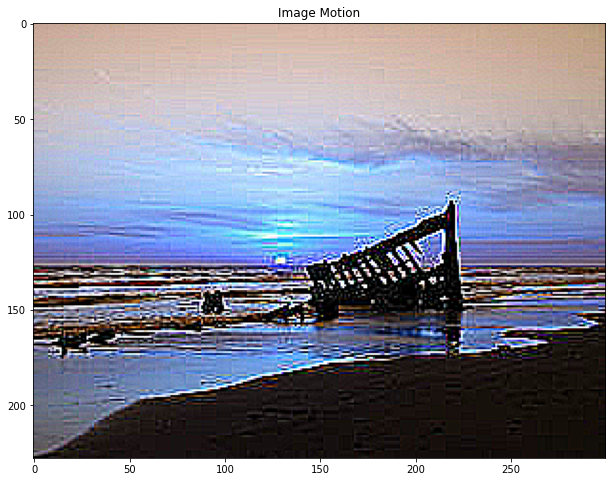

In [19]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1,-1,-1],
                                [-1,9,-1],
                                [-1,-1,-1]])


# implementando o filtro 
sharpened = cv2.filter2D(img, -1, kernel_sharpening_1)

# mostrando a imagem
plt.figure(figsize=(16,8))
plt.title("Image Motion")
plt.imshow(sharpened)

# Filtros "personalizados"

### Filtros do Instagram

Agora que temos um amplo arsenal de ferramentas para manipular imagens com o OpenCV, j√° conseguimos entender como s√£o feitos filtros prontos para imagens nas mais diversas plataformas, desde coisas mais simples como um filtro S√©pia para o Instagram, at√© manipula√ß√µes de imagens mais pesadas em programas como o Adobe Photoshop.

Abaixo, vamos ver como pode ser criado um filtro de Instagram usando OpenCV. O c√≥digo original pode ser encontrado [aqui](http://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/).

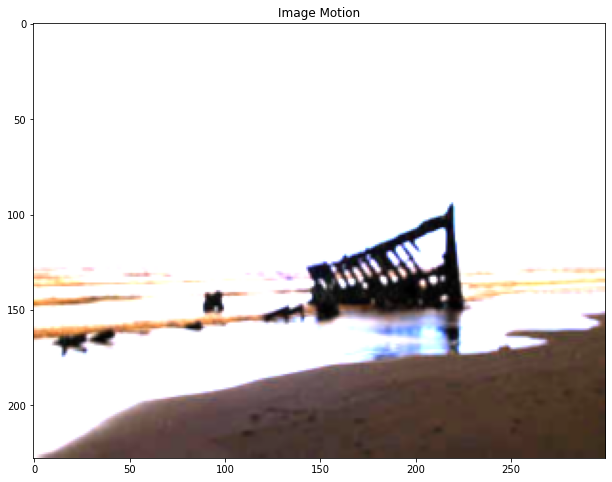

In [20]:
kernel = np.array([[0.272, 0.534, 0.131],
                   [0.349, 0.686, 0.168],
                   [0.393, 0.769, 0.189]])

sepia_image = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(16,8))
plt.title("Image Motion")
plt.imshow(sepia_image)

### Filtro Sketch



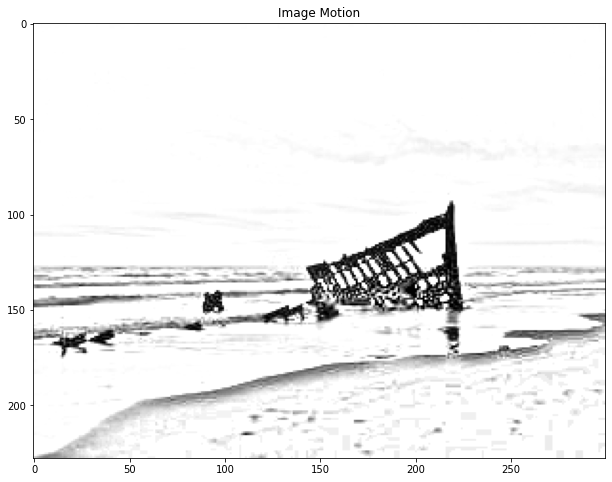

In [22]:
# etapa 1
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_image)

# etapa 2
inv_gray_image = 255 - gray_image
# cv2_imshow(inv_gray_image)

# etapa 3
blur_image = cv2.GaussianBlur(inv_gray_image, (21, 21), 0, 0)
# cv2_imshow(blur_image)

# etapa 4
sketch_image = cv2.divide(gray_image, 255 - blur_image, scale=256)

plt.figure(figsize=(16,8))
plt.title("Image Motion")
plt.imshow(sketch_image, cmap='gray')